In [2]:
import os
os.listdir()


['.ipynb_checkpoints',
 'EDA_RetailSales_task2.ipynb',
 'SQL - Retail Sales Analysis_utf .csv']

In [3]:
import pandas as pd

df = pd.read_csv("SQL - Retail Sales Analysis_utf .csv")
df.head()


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [5]:
# Dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (2000, 11)


In [6]:
# Dataset info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [7]:

# Statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all'))



Statistical Summary:
        transactions_id   sale_date sale_time  customer_id  gender  \
count       2000.000000        2000      2000  2000.000000    2000   
unique              NaN         647       766          NaN       2   
top                 NaN  2022-12-01  21:47:00          NaN  Female   
freq                NaN          12         9          NaN    1020   
mean        1000.500000         NaN       NaN    66.341500     NaN   
std          577.494589         NaN       NaN    44.937185     NaN   
min            1.000000         NaN       NaN     1.000000     NaN   
25%          500.750000         NaN       NaN    24.000000     NaN   
50%         1000.500000         NaN       NaN    69.000000     NaN   
75%         1500.250000         NaN       NaN   102.000000     NaN   
max         2000.000000         NaN       NaN   155.000000     NaN   

                age  category      quantiy  price_per_unit         cogs  \
count   1990.000000      2000  1997.000000     1997.000000  19

In [8]:

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64


In [9]:

# Sample of categorical column distribution (value_counts)
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())



Value counts for sale_date:
sale_date
2022-12-01    12
2023-11-22    12
2022-11-05    11
2023-10-01    11
2022-10-01    10
Name: count, dtype: int64

Value counts for sale_time:
sale_time
21:47:00    9
17:12:00    9
19:34:00    9
21:35:00    9
19:53:00    8
Name: count, dtype: int64

Value counts for gender:
gender
Female    1020
Male       980
Name: count, dtype: int64

Value counts for category:
category
Clothing       702
Electronics    684
Beauty         614
Name: count, dtype: int64


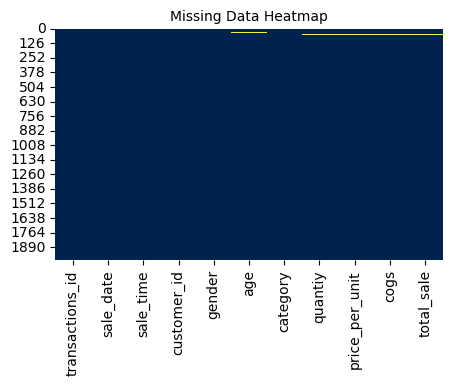

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), cbar=False, cmap="cividis")
plt.title("Missing Data Heatmap", fontsize=10)
plt.show()


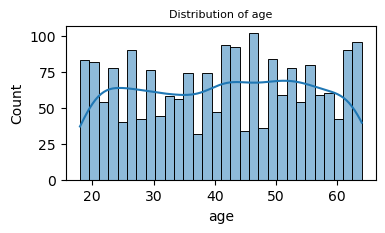

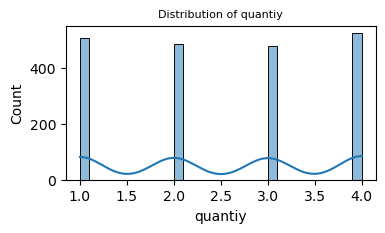

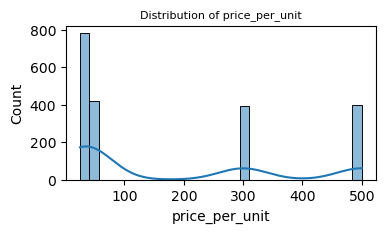

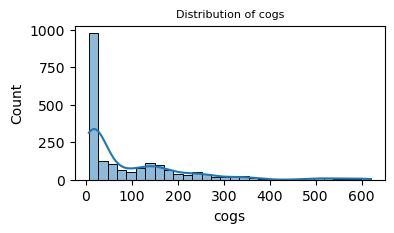

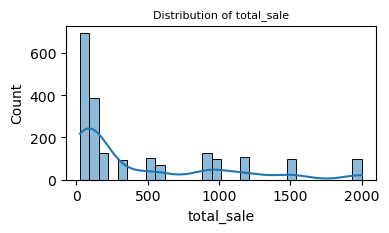

In [23]:
# 1. Histogram for numerical columns
num_cols = ['age', 'quantiy', 'price_per_unit', 'cogs', 'total_sale']

for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=8)
    plt.show()


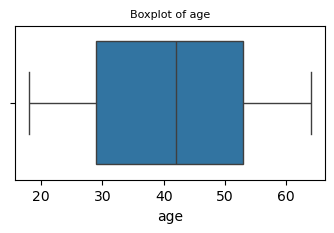

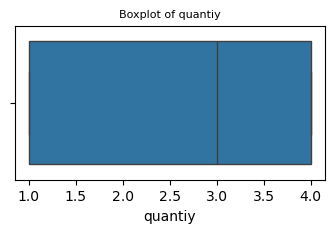

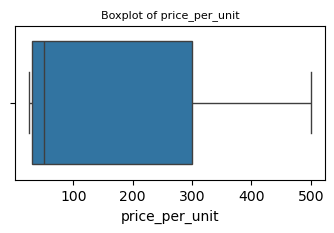

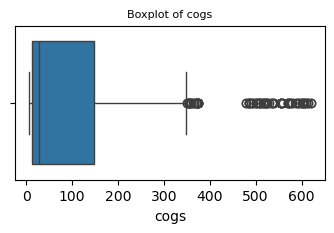

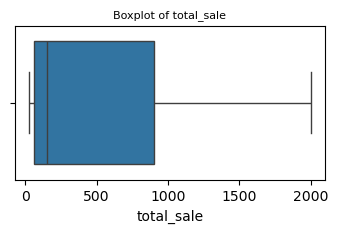

In [25]:
# 2. Boxplots for numerical columns (to check outliers)
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}", fontsize=8)
    plt.show()


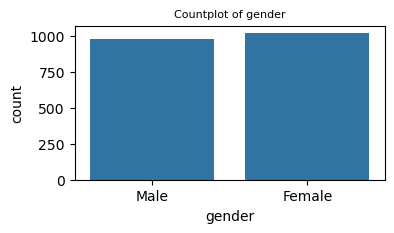

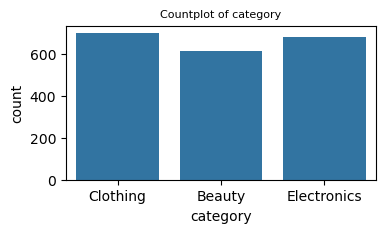

In [26]:
# 3. Countplots for categorical columns
cat_cols = ['gender', 'category']

for col in cat_cols:
    plt.figure(figsize=(4,2))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}", fontsize=8)
    plt.show()


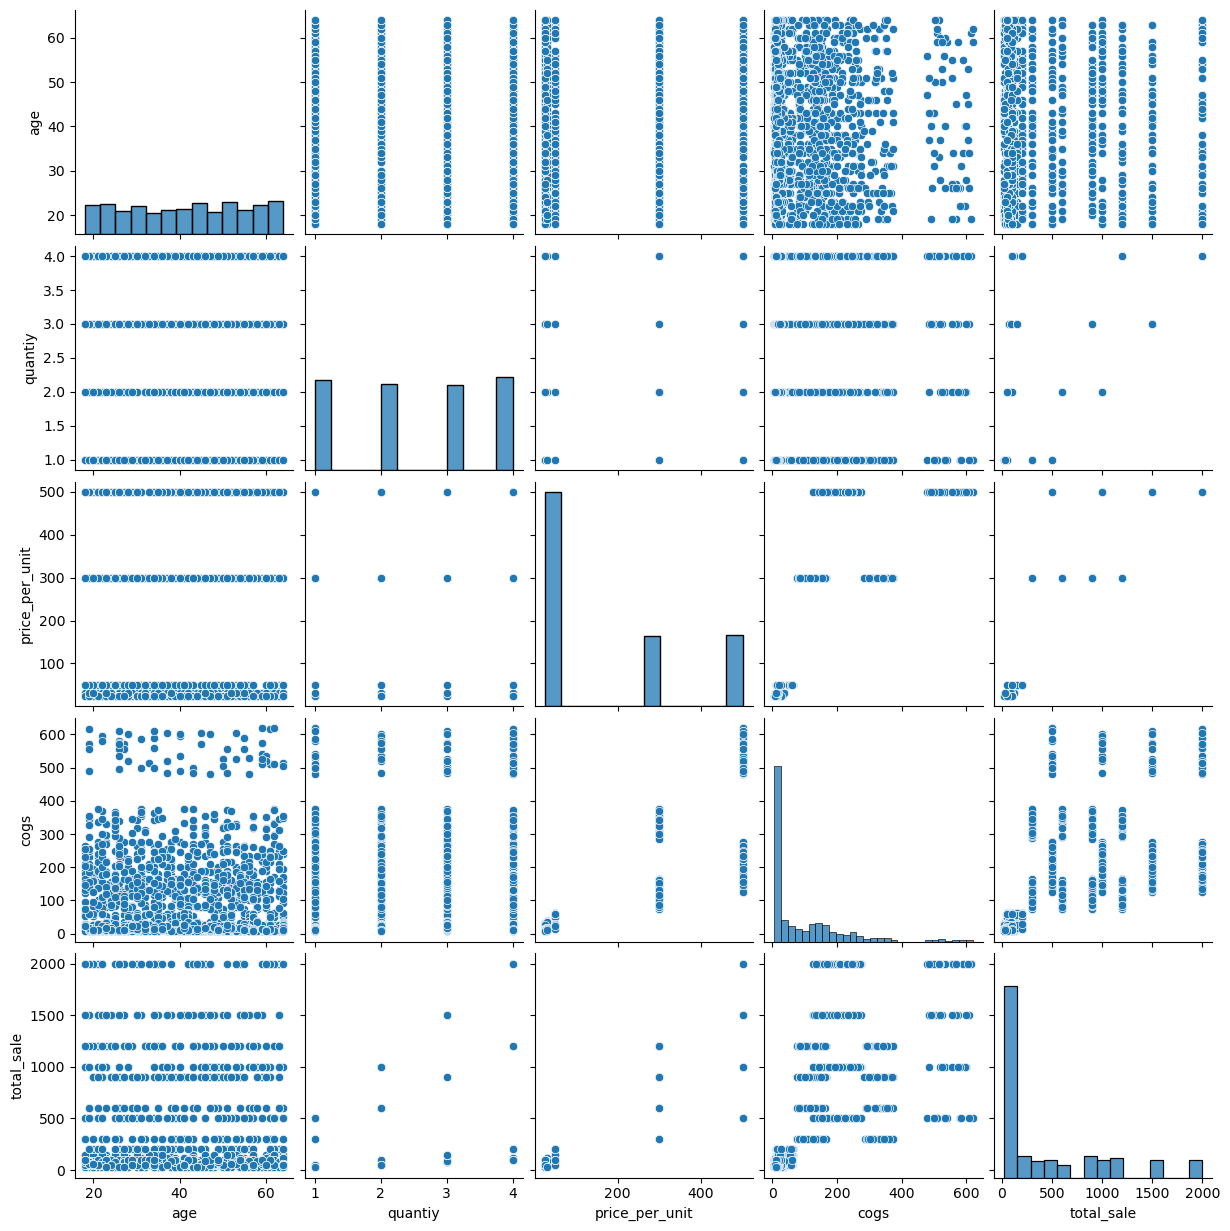

In [27]:
# 4. Pairplot for numerical relationships
sns.pairplot(df[num_cols])
plt.show()


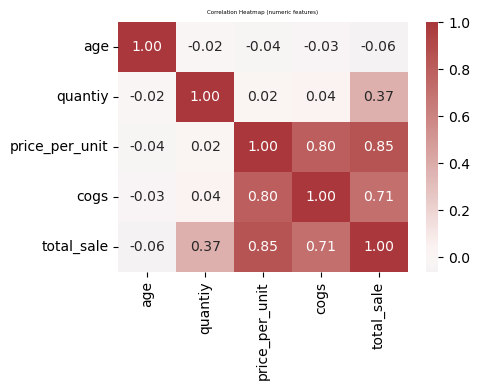

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns (IDs exclude)
id_cols = ['transactions_id','customer_id']
num_cols = [c for c in df.select_dtypes(include='number').columns if c not in id_cols]

# Correlation matrix
corr = df[num_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", center=0, cmap='vlag')
plt.title('Correlation Heatmap (numeric features)', fontsize=4)
plt.tight_layout()
plt.show()


In [35]:
# By category
grp_cat = df.groupby('category')['total_sale'].agg(['count','mean','median','sum']).sort_values('mean', ascending=False)
print("Category-wise summary:\n", grp_cat, "\n")

# By gender
grp_gender = df.groupby('gender')['total_sale'].agg(['count','mean','median','sum']).sort_values('mean', ascending=False)
print("Gender-wise summary:\n", grp_gender, "\n")

# Category x Gender pivot (average total_sale)
pivot = df.pivot_table(index='category', columns='gender', values='total_sale', aggfunc='mean')
print("Category vs Gender (average sales):\n", pivot)


Category-wise summary:
              count        mean  median       sum
category                                        
Beauty         612  468.692810   120.0  286840.0
Electronics    684  458.786550   150.0  313810.0
Clothing       701  443.751783   120.0  311070.0 

Gender-wise summary:
         count        mean  median       sum
gender                                     
Female   1017  457.620452   150.0  465400.0
Male      980  455.428571   120.0  446320.0 

Category vs Gender (average sales):
 gender           Female        Male
category                           
Beauty       452.939394  487.127660
Clothing     468.184438  419.802260
Electronics  451.382353  466.104651


In [36]:
# Show rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", missing_rows)

# Option 1: Drop rows where financials missing (only 3 rows)
df_clean = df.dropna(subset=['quantiy','price_per_unit','cogs','total_sale']).copy()

# Option 2: Fill missing age with median
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

print("After cleaning, shape:", df_clean.shape)


Rows with missing values:
     transactions_id   sale_date sale_time  customer_id  gender   age  \
24              432  2022-03-10  11:31:00           17  Female   NaN   
25             1367  2022-04-15  11:38:00           16  Female   NaN   
26             1391  2022-03-01  11:29:00          130    Male   NaN   
27             1432  2022-12-25  06:24:00           67  Female   NaN   
28              150  2022-04-13  08:25:00           89  Female   NaN   
29              845  2022-10-27  10:12:00           25    Male   NaN   
30             1150  2022-08-22  10:04:00           77  Female   NaN   
31             1845  2022-05-24  07:06:00           94    Male   NaN   
32              797  2022-09-16  06:38:00          116    Male   NaN   
33              921  2022-09-28  09:34:00          101    Male   NaN   
47              679  2022-08-26  08:59:00           64  Female  18.0   
48              746  2022-07-05  11:33:00           42  Female  33.0   
49             1225  2022-02-02  09:5

In [37]:
# Skewness check for numerical columns
print(df_clean[['age','quantiy','price_per_unit','cogs','total_sale']].skew())


age              -0.043094
quantiy          -0.011985
price_per_unit    0.733427
cogs              2.000618
total_sale        1.372853
dtype: float64


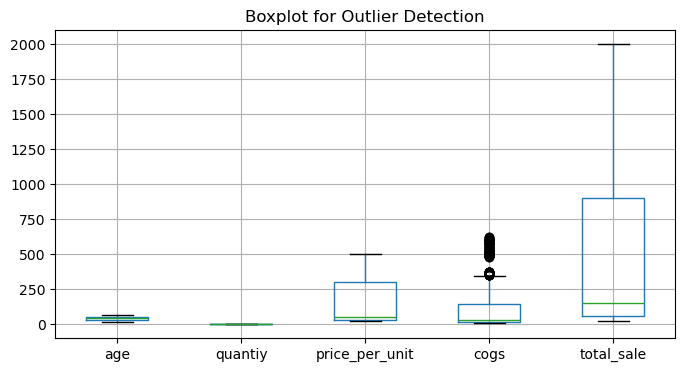

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier check for numerical columns
plt.figure(figsize=(8,4))
df_clean[['age','quantiy','price_per_unit','cogs','total_sale']].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()


In [40]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: removing outliers from 'price_per_unit'
df_clean = remove_outliers(df_clean, 'price_per_unit')

# Check shape after removal
df_clean.shape


(1997, 11)

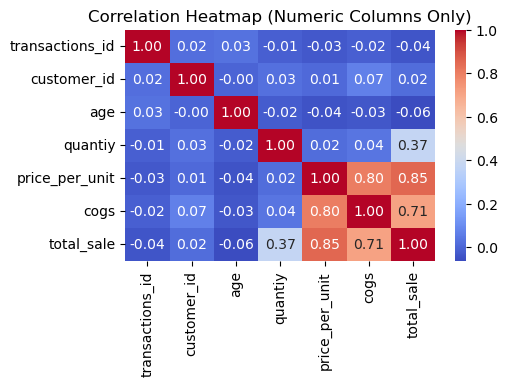

In [43]:
# Sirf numeric columns select karke correlation check
numeric_df = df_clean.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(5,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


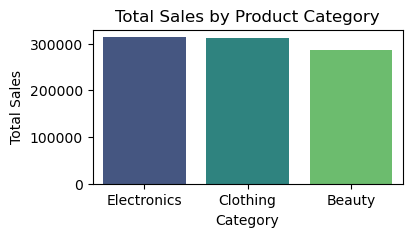

In [48]:
plt.figure(figsize=(4,2))
sns.barplot(
    x=category_sales.index, 
    y=category_sales.values, 
    hue=category_sales.index,   # added
    palette="viridis", 
    legend=False                # added
)
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


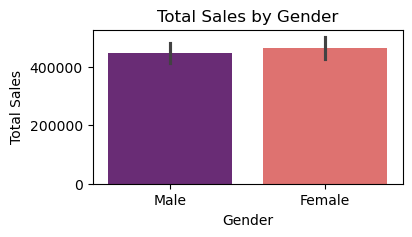

In [50]:
plt.figure(figsize=(4,2))
sns.barplot(
    data=df,
    x="gender",
    y="total_sale",
    hue="gender",       # add hue
    palette="magma",
    estimator=sum,
    legend=False        # hide legend
)
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()


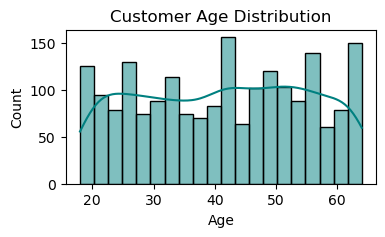

In [52]:
plt.figure(figsize=(4,2))
sns.histplot(df["age"], bins=20, kde=True, color="teal")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


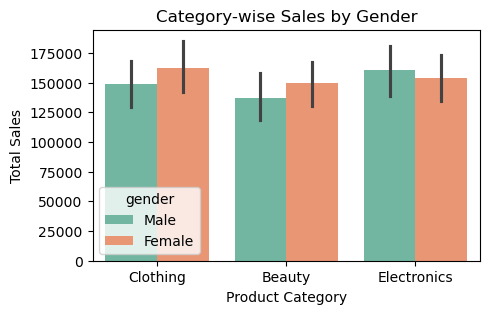

In [53]:
plt.figure(figsize=(5,3))
sns.barplot(
    data=df,
    x="category",
    y="total_sale",
    hue="gender",       # male vs female split
    palette="Set2",
    estimator=sum
)
plt.title("Category-wise Sales by Gender")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()


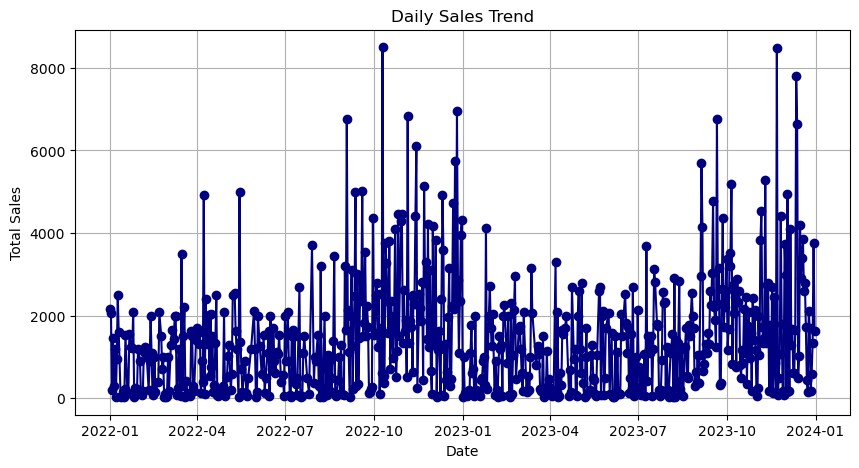

In [54]:
# Convert sale_date to datetime (if not already)
df["sale_date"] = pd.to_datetime(df["sale_date"])

# Group sales by date
daily_sales = df.groupby("sale_date")["total_sale"].sum()

# Plot sales trend
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, marker="o", color="navy")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


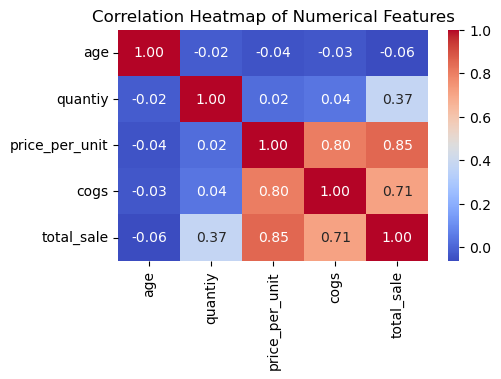

In [55]:
plt.figure(figsize=(5,3))
corr = df[["age","quantiy","price_per_unit","cogs","total_sale"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


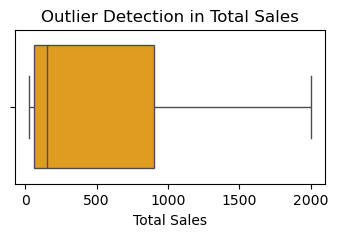

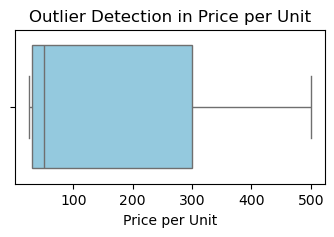

In [57]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df["total_sale"], color="orange")
plt.title("Outlier Detection in Total Sales")
plt.xlabel("Total Sales")
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(x=df["price_per_unit"], color="skyblue")
plt.title("Outlier Detection in Price per Unit")
plt.xlabel("Price per Unit")
plt.show()


In [60]:
print(df.columns)


Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')


In [61]:
avg_sale_category = df.groupby('category')['total_sale'].mean().reset_index()
print(avg_sale_category)


      category  total_sale
0       Beauty  468.692810
1     Clothing  443.751783
2  Electronics  458.786550


In [62]:
total_sale_category = df.groupby('category')['total_sale'].sum().reset_index()
print(total_sale_category)


      category  total_sale
0       Beauty    286840.0
1     Clothing    311070.0
2  Electronics    313810.0


In [63]:
avg_sale_gender = df.groupby('gender')['total_sale'].mean().reset_index()
total_sale_gender = df.groupby('gender')['total_sale'].sum().reset_index()
print(avg_sale_gender)
print(total_sale_gender)


   gender  total_sale
0  Female  457.620452
1    Male  455.428571
   gender  total_sale
0  Female    465400.0
1    Male    446320.0


In [64]:
category_gender_sale = df.groupby(['category','gender'])['total_sale'].sum().reset_index()
print(category_gender_sale)


      category  gender  total_sale
0       Beauty  Female    149470.0
1       Beauty    Male    137370.0
2     Clothing  Female    162460.0
3     Clothing    Male    148610.0
4  Electronics  Female    153470.0
5  Electronics    Male    160340.0
